<h3>Imports</h3>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Read data

In [53]:
data = pd.read_csv('IrisData.txt')

<h3>Task 1</h3>

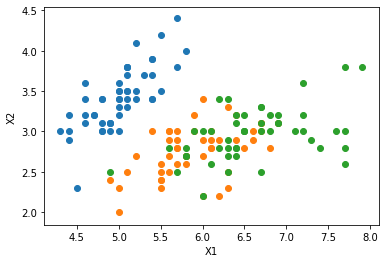

In [54]:
# Separating the columns
X1 = data['X1']
X2 = data['X2']
X3 = data['X3']
X4 = data['X4']
label = data['Class']

# Plotting X1 and X2
plt.figure('fig1')
plt.scatter(X1[:50], X2[:50])
plt.scatter(X1[51:100], X2[51:100])
plt.scatter(X1[101:], X2[101:])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

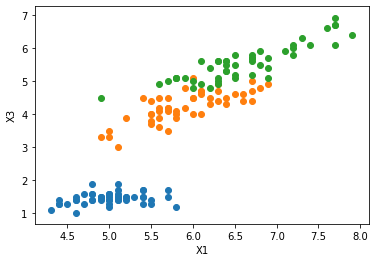

In [55]:
# Plotting X1 and X3
plt.figure('fig2')
plt.scatter(X1[:50], X3[:50])
plt.scatter(X1[51:100], X3[51:100])
plt.scatter(X1[101:], X3[101:])
plt.xlabel('X1')
plt.ylabel('X3')
plt.show()

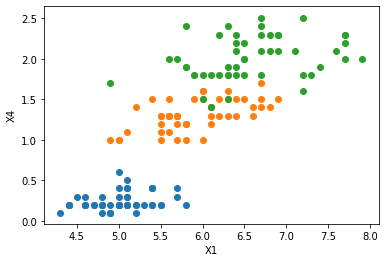

In [56]:
# Plotting X1 and X4
plt.figure('fig2')
plt.scatter(X1[:50], X4[:50])
plt.scatter(X1[51:100], X4[51:100])
plt.scatter(X1[101:], X4[101:])
plt.xlabel('X1')
plt.ylabel('X4')
plt.show()

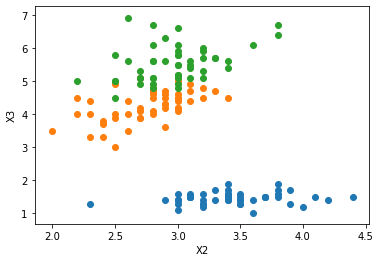

In [57]:
# Plotting X2 and X3
plt.figure('fig3')
plt.scatter(X2[:50], X3[:50])
plt.scatter(X2[51:100], X3[51:100])
plt.scatter(X2[101:], X3[101:])
plt.xlabel('X2')
plt.ylabel('X3')
plt.show()

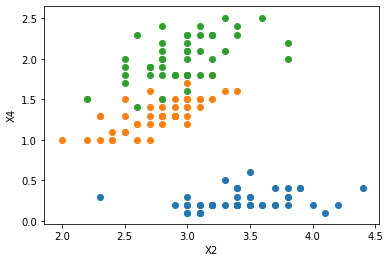

In [58]:
# Plotting X2 and X4
plt.figure('fig4')
plt.scatter(X2[:50], X4[:50])
plt.scatter(X2[51:100], X4[51:100])
plt.scatter(X2[101:], X4[101:])
plt.xlabel('X2')
plt.ylabel('X4')
plt.show()

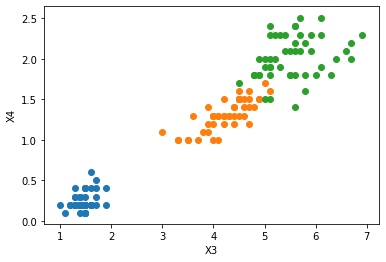

In [59]:
# Plotting X3 and X4
plt.figure('fig5')
plt.scatter(X3[:50], X4[:50])
plt.scatter(X3[51:100], X4[51:100])
plt.scatter(X3[101:], X4[101:])
plt.xlabel('X3')
plt.ylabel('X4')
plt.show()

<h3>Task 2</h3>

In [60]:
# Signum function
def signum(x):
    if x == 0:
        return 0
    if x > 0:
        return 1
    if x < 0:
        return -1

In [61]:
# Perceptron Implementation
# Input: data, feature1 name, feature2 name, class1 name, class2 name
# learning rate, epochs, use_bias (bool)
def perceptron(x_train, y_train, learning_rate, epochs, use_bias):
    w = np.random.rand(1, 2)[0]
    w = np.reshape(w, newshape=(1, 2))
    if use_bias == 1:
        b = np.random.rand(1, 1)[0][0]
    else:
        b = 0
    for epoch in range(epochs):
        for i in range(len(x_train)):
            tmp_x = np.reshape(x_train[i], (2, 1))
            v = np.dot(w, tmp_x) + b
            #print(type(v), v.shape)
            #print(v, w.shape, tmp_x.shape)
            #print(w)
            #print(tmp_x)
            y = signum(v)
            if y != y_train[i]:
                L = y_train[i] - y
                w = w + learning_rate * np.dot(L, tmp_x.T)
                if use_bias:
                    b = b + learning_rate * np.dot(L, tmp_x.T)
    return w, b


In [62]:
def test(x_test, y_test, w, b):
    y_prediction = np.dot(w.T, x_test) + b
    accuracy = np.mean(y_prediction == y_test) * 100
    return

In [63]:
def extract_data(x1, x2, c1, c2):
    data1 = None
    data2 = None
    data1_y = np.ones([50, 1])
    data2_y = np.ones([50, 1]) * -1

    if c1 == "Iris-setosa" or c2 == "Iris-setosa":
        data1 = data[[x1, x2]][:50]
        if c1 == "Iris-versicolor" or c2 == "Iris-versicolor":
            data2 = data[[x1, x2]][50:100]
        else:
            data2 = data[[x1, x2]][100:]
    elif c1 == "Iris-versicolor" or c2 == "Iris-versicolor":
        data1 = data[[x1, x2]][50:100]
        data2 = data[[x1, x2]][100:]

    data_x = np.append(data1, data2, axis=0)
    data_y = np.append(data1_y, data2_y, axis=0)
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.4, shuffle=True)

    return x_train, y_train, x_test, y_test


In [64]:
def main(x1, x2, c1, c2, learning_rate, epochs, use_bias):
    if x1 == x2 or c1 == c2:
        print("You cannot select same feature/class twice")
        return

    x_train, y_train, x_test, y_test = extract_data(x1, x2, c1, c2)
    w, b = perceptron(x_train, y_train, learning_rate, epochs, use_bias)
    y_prediction_of_training_set = np.dot(w, x_train.T) + b

    plt.plot(x_train, y_prediction_of_training_set, label='Decision Boundary')
    if c1 == "Iris-setosa" or c2 == "Iris-setosa":
        plt.scatter(data[x1][:50], data[x2][:50])
        if c1 == "Iris-versicolor" or c2 == "Iris-versicolor":
            plt.scatter(data[x1][50:100], data[x2][50:100])
        else:
            plt.scatter(data[x1][100:], data[x2][100:])
    if c1 == "Iris-versicolor" or c2 == "Iris-versicolor":
        plt.scatter(data[x1][50:100], data[x2][50:100])
        plt.scatter(data[x1][100:], data[x2][100:])

    test(x_test, y_test, w, b)

    return

<h1>UI</h1>

In [65]:
from tkinter import *

In [66]:
input_window = Tk()
input_window.title("Neural Networks Task 1")
input_window.geometry("500x500")
iris_features = ['X1', 'X2', 'X3', 'X4']
iris_flowers = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

<h3>Features Dropdown Lists</h3>

In [67]:
#feature 1 label
feature1_value = StringVar()
feature1_label = Label(input_window, textvariable = feature1_value) 
feature1_value.set("Feature 1")
feature1_label.place(x=138, y=95)
# feature 1 dropdown list
feature1_var = StringVar(input_window)
feature1 = OptionMenu(input_window, feature1_var, *iris_features)
feature1.config(width=12, font=('Helvetica', 10)) #change width and font of list
#feature1_var.set('features') # set the default option
feature1.place(x=190, y=90) # Add dropdown list to input_window

In [68]:
#feature 2 label
feature2_value = StringVar()
feature2_label = Label(input_window, textvariable = feature2_value) 
feature2_value.set("Feature 2")
feature2_label.place(x=138, y=125)
#feature 2 dropdown list
feature2_var = StringVar(input_window)
feature2 = OptionMenu(input_window, feature2_var, *iris_features)
feature2.config(width=12, font=('Helvetica', 10))
#feature2_var.set('features') # set the default option
feature2.place(x=190, y=120)

<h3>Classes Dropdown Lists</h3>

In [69]:
#Class 1 label
class1_value = StringVar()
class1_label = Label(input_window, textvariable = class1_value) 
class1_value.set("Class 1")
class1_label.place(x=150, y=155)
#Class 1 drodown list
class1_var = StringVar(input_window)
class1 = OptionMenu(input_window, class1_var, *iris_flowers)
class1.config(width=12, font=('Helvetica', 10))
#class1_var.set('Classes') # set the default option
class1.place(x=190, y=150)

In [70]:
#Class 2 label
class2_value = StringVar()
class2_label = Label(input_window, textvariable = class2_value) 
class2_value.set("Class 2")
class2_label.place(x=150, y=185)
#Class 2 dropdown list
class2_var = StringVar(input_window)
class2 = OptionMenu(input_window, class2_var, *iris_flowers)
class2.config(width=12, font=('Helvetica', 10))
#class2_var.set('Classes') # set the default option
class2.place(x=190, y=180)

<h3>Learning Rate</h3>

In [71]:
#learning rate label
learning_rate_value = StringVar()
learning_rate_label = Label(input_window, textvariable = learning_rate_value) 
learning_rate_value.set("Learning Rate")
learning_rate_label.place(x=113, y=210)
#learning rate text
learning_rate_text = Entry(input_window)
learning_rate_text.place(x=193, y=210)
learning_rate_text.focus_set()

<h3>Epochs</h3>

In [72]:
#Epochs label
epochs_label_value = StringVar()
epochs_label = Label(input_window, textvariable = epochs_label_value) 
epochs_label_value.set("Epochs")
epochs_label.place(x=150, y=240)
#Epochs text
epochs_text = Entry(input_window)
epochs_text.place(x=193, y=240)
epochs_text.focus_set()

<h3>Bias</h3>

In [73]:
#Bias check box
bias_checkbox = IntVar()
Checkbutton(input_window, text="Bias", variable=bias_checkbox).place(x=190,y=260)

<h3>Training The Model Button</h3>

In [74]:
def submit_button():
    main(feature1_var.get(), feature2_var.get(), class1_var.get(), class2_var.get(), float(learning_rate_text.get()),
         int(epochs_text.get()), int(bias_checkbox.get()))


In [75]:
#Button
train_model_button = Button(input_window, text='Train Model', width=17, command=submit_button)
train_model_button.place(x=190, y=300)

In [ ]:
input_window.mainloop() #open window

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mirna\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-74-c10a8275f3fb>", line 3, in submit_button
    int(epochs_text.get()), int(bias_checkbox.get()))
  File "<ipython-input-64-77d2ed7536d1>", line 10, in main
    plt.plot(x_train, y_prediction_of_training_set, label='Decision Boundary')
  File "C:\Users\Mirna\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 2796, in plot
    is not None else {}), **kwargs)
  File "C:\Users\Mirna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 1665, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "C:\Users\Mirna\Anaconda3\lib\site-packages\matplotlib\axes\_base.py", line 225, in __call__
    yield from self._plot_args(this, kwargs)
  File "C:\Users\Mirna\Anaconda3\lib\site-packages\matplotlib\axes\_base.py", line 391, in _plot_args
    x, y = self._xy_from_xy(x, y)
